 # MP1 - ECE 498:  Data Science & Analytics
 
 
 # Group members (NetIDs): 
    
 ##   Akhilesh Somani (somani4)
 ##   Gowtham Kuntumalla (gowtham4)
 ##   Manan Mehta (mananm2)

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np  
from datetime import datetime
from scipy import stats as st
import math

# to handle file imports for different OS
import os
from pathlib import Path 

# ----------------------------- Task 0 -----------------------------

In [2]:
folder = Path(os.getcwd())
file1 = folder / 'mp1_av_disengagements.csv'
file2 = folder / 'mp1_av_totalmiles.csv'
dseng_df = pd.read_csv(file1)
summary_month_df = pd.read_csv(file2)

# make number of months unique by combining different cars
summary_month_df = summary_month_df.groupby('Month',sort=False, as_index = False).sum()


In [3]:
dseng_df.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [4]:
summary_month_df.head()

,Month,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,14-Sep,4207,44,24,20
1,14-Oct,61881,244,111,133
2,14-Nov,58824,189,85,104
3,14-Dec,9413,36,15,21
4,15-Jan,18192,48,18,30


### 0.2 (a) Total number of AV disengagements: 1024

In [5]:
dseng_df.count()

Month            1024
Car              1024
Location         1024
Weather          1024
TypeOfTrigger    1024
ReactionTime      492
Cause            1024
dtype: int64

### 0.2 (b) Number of unique months that have recorded AV disengagements: 15

In [6]:
dseng_df['Month_actual'] = dseng_df['Month'].apply(lambda x:x.split("-")[1])

In [7]:
dseng_df['Month'].nunique()

15

### 0.2 (c) List of unique locations of AV disengagements: 2

In [8]:
dseng_df['Location'].nunique()

2

### 0.2 (d) Number of unique causes for AV disengagements: 10 

In [9]:
dseng_df['Cause'].nunique()

10

### 0.2 (e) ReactionTime has 532 missing values because Manual Trigger

In [10]:
dseng_df.isnull().sum()

Month              0
Car                0
Location           0
Weather            0
TypeOfTrigger      0
ReactionTime     532
Cause              0
Month_actual       0
dtype: int64

### 0.3 The top two leading causes of disengagement: Recklessly behaving agent and Unwanted Driver Discomfort

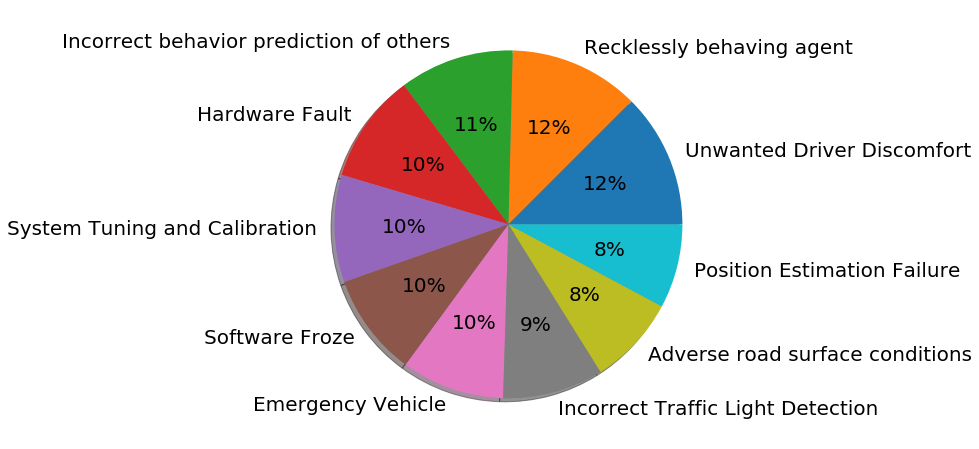

In [11]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
import matplotlib as mpl
mpl.rcParams['font.size'] = 20.0

causes = dseng_df['Cause'].value_counts()
causes = causes[causes>10]
patches, texts, _ = plt.pie(causes, 
        # grab labels from frame keys
        labels=causes.keys(),
        # some formatting
        autopct='%.0f%%', shadow=True)
#plt.legend(patches, labels=causes.keys(), bbox_to_anchor=(0.85,1.025),loc="upper left")
#plt.axis('equal')
plt.show()

### 0.4 AVs are indeed maturing over time

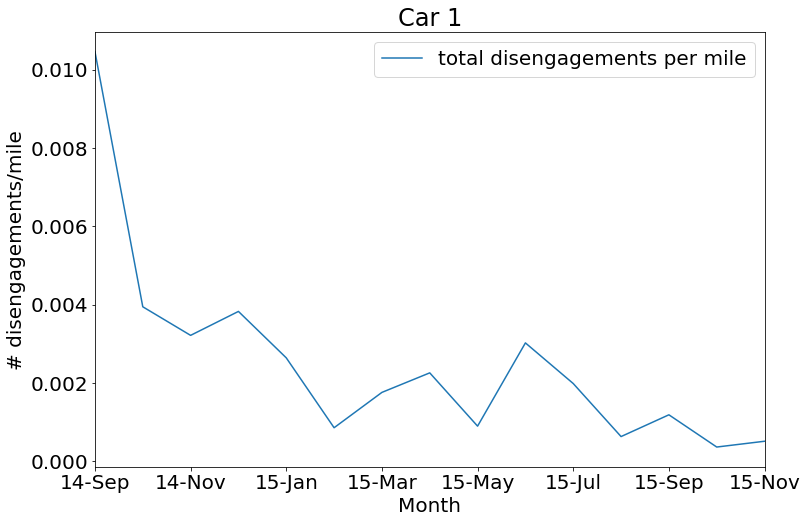

In [12]:
#disengagement/mile
summary_month_df['total disengagements per mile'] = summary_month_df['total number of disengagements']\
/summary_month_df['miles driven in autonomous mode']

#print(summary_month_df['total disengagement per mile'])

summary_month_df.iloc[:15,:].plot(x = 'Month',y = 'total disengagements per mile')
plt.xlabel('Month')
plt.ylabel('# disengagements/mile')
plt.title('Car 1')
plt.show()

# ----------------------------- Task 1 -----------------------------

### 1.1 Various distributions:

#### a. Gaussian distribution : 
Also called normal distribution, samples drawn from it follow the general distribution which is given by 
$$ {\ f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}} $$

Samples drawn are likely to be close to the mean. and those far away are less likely.

#### b. Exponential distribution:
Here the general distribution is given by 
$$ f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases} $$

Samples drawn are likely to be close to Zero. Another key property is memorylessness. i.e. conditional probabability boils down to simple exponentials (only the time period matters not when it starts).

#### c. Weibull distribution:

Here the general distribution is given by 
$$ 
f(x;\lambda,k) =
\begin{cases}
\frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^{k}} & x\geq0 ,\\
0 & x<0,
\end{cases} $$

It is a generalisation of standard exponential distribution (k = 1). 

If X = time-to-failure, then k < 1 indicates failure rate goes down as parts life increases, i.e. probaility that samples fail is very high when X is close to zero and then it decreases. Vice versa for k > 1.


### 1.2 Reaction times of drivers

In Weibull distribution fit, k value is 0.3


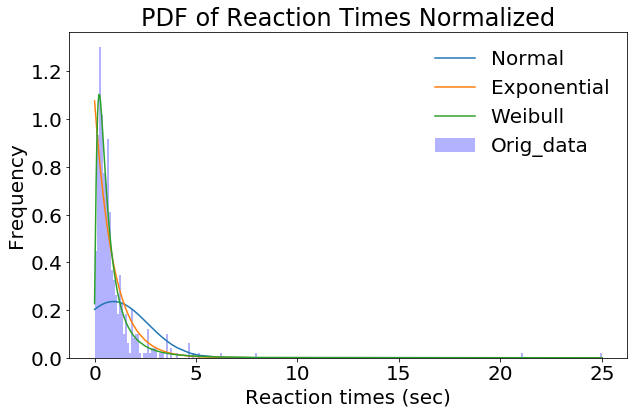

In [13]:

""" Actual PDF of reaction times using histograms """ 
plt.figure(figsize = (10,6))

reaction_t = dseng_df['ReactionTime'].dropna()
reaction_t.plot(kind='hist', bins  = 250, density = True, alpha=0.3, color = 'blue', label = 'Orig_data')

"""fitting scikit-learn stats model  """ 

x_data = sorted(reaction_t)
# normal
mean, var = st.norm.fit(x_data)
plt.plot(x_data, st.norm.pdf(x_data,mean,var), label = 'Normal')

# exponential
loc, scale = st.expon.fit(x_data)
plt.plot(x_data, st.expon.pdf(x_data,loc, scale), label = 'Exponential')

# weibull

args = st.exponweib.fit(x_data)
plt.plot(x_data, st.exponweib.pdf(x_data,*args), label = 'Weibull')
print("In Weibull distribution fit, k value is {0}".format(round(list(args)[1],2)))

plt.xlabel('Reaction times (sec)')
plt.ylabel('Frequency')
plt.title('PDF of Reaction Times Normalized')
plt.legend(frameon = False, loc = 'best')
plt.show()
 

### Observation: We see that the weibull distribution fits well. Parameter 'k' < 1 so the reaction times are largely populated in the beginning and go down with time.

### 1.3 Average Reaction Times

In [14]:
print("1.3(a) Average Reaction Time for entire data set = {0} sec \n\n".format(round(reaction_t.mean(),2)))

print("1.3(b) Average Reaction Time (sec) by \n")
print( round(dseng_df['ReactionTime'].groupby(dseng_df['Location']).mean(),2))


1.3(a) Average Reaction Time for entire data set = 0.93 sec 


1.3(b) Average Reaction Time (sec) by 

Location
highway         1.48
urban-street    0.93
Name: ReactionTime, dtype: float64


### 1.4 Hypothesis testing of reaction times 

Define 

H0 : AV_mean = 1.09 sec

H1 : AV_mean != 1.09 sec

Significance level  = 0.05

We will apply a two tail test asssuming H0 is true. We will test if 0.93 sec is in statistical limits of assumed population mean (= 1.09 sec)


In [15]:
std_AV_sample = reaction_t.std()
mean_AV_sample = reaction_t.mean()
mean_nonAV_pop = 1.09
est_std_AV_pop = std_AV_sample/math.sqrt(dseng_df['ReactionTime'].dropna().count())
z_stat = (mean_AV_sample - mean_nonAV_pop)/est_std_AV_pop

z_score = st.norm.cdf(z_stat)

print("Z-score ({0}) < 0.025 (two-tailed test) so we reject null hypothesis".format(round(z_score,3)))


Z-score (0.018) < 0.025 (two-tailed test) so we reject null hypothesis


### 1.5 PDF of Disengagements/mile with monthly granularity

In [16]:
# This function was taken from an external source (stackoverflow) and edited to fit our code
# https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

def get_best_distribution(data, distributions):
    results = []
    parameters = {}
    for distribution in distributions:
        dist = getattr(st, distribution)
        # fit the distribution and get parameters
        parameter = dist.fit(data)
        parameters[distribution] = parameter
        
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, distribution, args=parameter)
        results.append((distribution, p))

    # select the best fitted distribution
    best_distribution, best_p_value = (max(results, key = lambda item: item[1]))

    print("Best fitting distribution: " + str(best_distribution))
    print("Best p value: "+ str(best_p_value))
    print("Parameters for the best fit: "+ str(parameters[best_distribution]))

    return best_distribution, best_p_value, parameters[best_distribution]

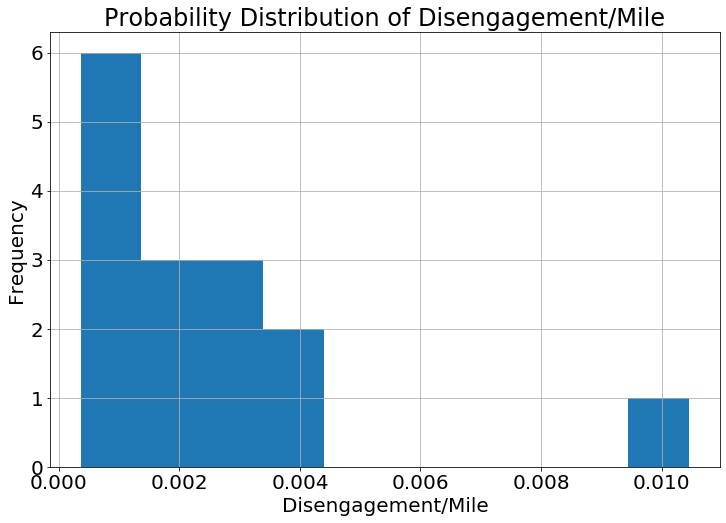

Best fitting distribution: expon
Best p value: 0.9806696005068393
Parameters for the best fit: (0.0003605973188528763, 0.0021407886857360853)


/Users/gowthamkuntumalla/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:1469: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


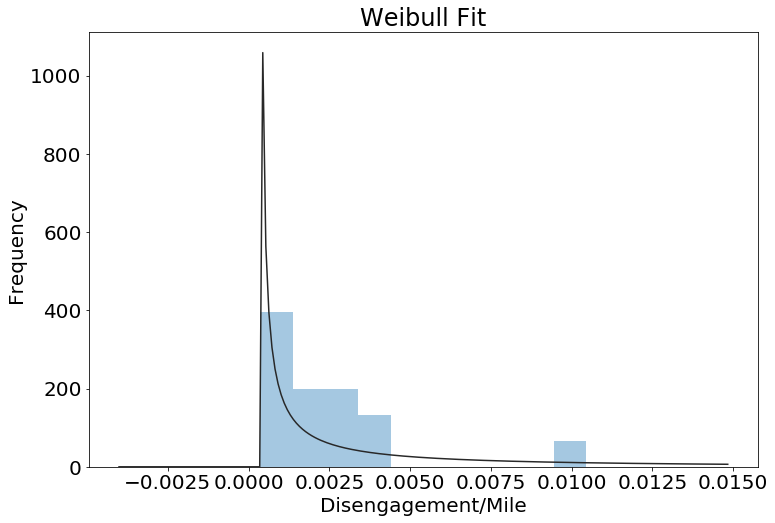

In [17]:

hist = summary_month_df['total disengagements per mile'].dropna().hist(bins = 10)
plt.title('Probability Distribution of Disengagement/Mile')
plt.xlabel('Disengagement/Mile')
plt.ylabel('Frequency')
plt.show()

data_to_fit = summary_month_df['total disengagements per mile'].dropna()
distributions = ['norm','expon','exponweib','weibull_min']
best_distribution, best_p_value, parameters = get_best_distribution(data_to_fit, distributions)

ax = sns.distplot(summary_month_df['total disengagements per mile'].dropna(), kde=False, fit=st.weibull_min, bins=10)
plt.title('Weibull Fit')
plt.xlabel('Disengagement/Mile')
plt.ylabel('Frequency')
plt.show()

Weibull_min distribution fits well. We see that the number of # of
Occurences of Disengagements/mile parameter goes down. 
(parameter k<1: Failure rate decreases over time)


# ----------------------------- Task 2 -----------------------------

### 2.1 Basic Probability

Assumptions in mathematical form:


1. **Random Variable:** X = disengagements per mile $\in$ {0-no_diseng,1-diseng}  <br>
2. **Conditions(C):** Clear - Cl, Cloudy - Cy <br>
   P(C = Cl) = 0.72 & P(C = Cy) = 0.28 <br>
3. AV drives equally well on both types of days


#### 2.1.a.  Random variable for each individual mile follows a **Bernoulli** distribution. A combination of multiple miles follows a **Binomial** distribution.

#### 2.1.b $$ P(X = 1 | C = Cy) = \frac {P(C = Cy | X = 1) * P (X = 1)}{P(C = Cy)} $$

In [18]:
dseng_month_df = dseng_df.groupby(['Month','Weather'], sort = False, as_index = False).count()

#add clear and cloudy day miles in summary df
summary_month_df['clear_day_miles'] = summary_month_df['miles driven in autonomous mode'] * 0.72
summary_month_df['cloudy_day_miles'] = summary_month_df['miles driven in autonomous mode'] * 0.28
summary_month_df.index = summary_month_df['Month']



In [19]:
P_clear = 0.72
P_cloudy = 1-P_clear #  = 0.28

# prob that disengagements occur
P_diseng1 = summary_month_df['total number of disengagements'].sum()/ summary_month_df['miles driven in autonomous mode'].sum() 

# prob that weather = cloudy given diseng, Cause is just a proxy variable for unique rows, it can be one of the other columns as well
P_cloudy_diseng1 = dseng_month_df[dseng_month_df['Weather'] == 'cloudy']['Cause'].sum()/dseng_month_df['Cause'].sum()

# answer
P_diseng1_cloudy = (P_cloudy_diseng1 * P_diseng1)/P_cloudy
print('Probability of disengagement per mile on a cloudy day is {0:.{1}f}'.format(P_diseng1_cloudy,5))


Probability of disengagement per mile on a cloudy day is 0.00590


#### 2.1.c $$ P(X = 1 | C = Cl) = \frac {P(C = Cl | X = 1) * P (X = 1)}{P(C = Cl)} $$

In [20]:
P_clear_diseng1 = dseng_month_df[dseng_month_df['Weather'] == 'clear']['Cause'].sum()/dseng_month_df['Cause'].sum()
P_diseng1_clear = (P_clear_diseng1 * P_diseng1)/P_clear
print('Probability of disengagement per mile on a clear day is {0:.{1}f}'.format(P_diseng1_clear,5))


Probability of disengagement per mile on a clear day is 0.00052


#### 2.1.d In light of above question, we just replace the 'total number of disengagements' column with 'automatic disengagements' column


$$ P(X = auto1 | C = Cy) = \frac {P(C = Cy | X = auto1) * P (X = auto1)}{P(C = Cy)} $$
$$ P(X = auto1 | C = Cl) = \frac {P(C = Cl | X = auto1) * P (X = auto1)}{P(C = Cl)} $$

In [21]:
P_automatic = summary_month_df['number of automatic disengagements'].sum()/ summary_month_df['miles driven in autonomous mode'].sum() 




P_clear_automatic = len(dseng_df[(dseng_df['TypeOfTrigger'] == 'automatic') & (dseng_df['Weather'] == 'clear')])/len(dseng_df[dseng_df['TypeOfTrigger'] == 'automatic'])
P_cloudy_automatic = len(dseng_df[(dseng_df['TypeOfTrigger'] == 'automatic') & (dseng_df['Weather'] == 'cloudy')])/len(dseng_df[dseng_df['TypeOfTrigger'] == 'automatic'])

P_automatic_clear = P_clear_automatic * P_automatic / P_clear
P_automatic_cloudy = P_cloudy_automatic * P_automatic / P_cloudy

print('Probability of automatic disengagement per mile on a clear day is {0:.{1}f}'.format(P_automatic_clear,5))
print('Probability of automatic disengagement per mile on a cloudy day is {0:.{1}f}'.format(P_automatic_cloudy,5))



Probability of automatic disengagement per mile on a clear day is 0.00026
Probability of automatic disengagement per mile on a cloudy day is 0.00281


#### 2.1.e How likely is it that in 12000 miles, there are 150 or more disengagements under cloudy conditions? [Hint: Think of an appropriate approximation that makes the computation feasible/easier.]

this is a binomial disribution, we need to find P(Y>150|cloudy) where Y is the binomial random variable. Y is sum of all individual trials (miles in this case).

Example: Y = 200 indicates that disengagements happened in 200 out of 12000 miles 

$$ P(Y>150|cloudy)  =  \sum_{i = 150}^{12000} {12000\choose150} * P^{i} * (1-P)^{12000-i} $$
where  P = P(X=1|C = Cy) == 0.0059


#reference for approximation: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/binomial-theorem/normal-approximation-to-the-binomial/
large sample sie (np > 5) so central limit theorem is used 

For the original **Binomial Distribution** summary statistics are: <br>

$\mu$  = n*P = 12000 x 0.0059 = 70.8 <br>
$\sigma^{2} $ = nxPx(1-P) = 70.383 <br>

**Normal Distribution**:
$$ Z = \frac {Y - \mu} {\sigma} $$ 

**Approximate solution**:
$$ P(Y \ge 150) = 1 - P(Y < 150) = 1 - P(Z < \frac{150 - \mu}{\sigma}) $$
$$  = 1 - P(Z < \frac{149.5 - 70.8}{\sqrt{70.383}}) $$ # continuity correction factor
$$  = 1 - P(Z < 9.38) $$

In [22]:
P_Y150_cloudy = 1- st.norm.cdf(9.38)
print("Probabiity that in 12000 miles, there are 150 or more disengagements \
under cloudy conditions is {0}".format(P_Y150_cloudy))
print("The value is very low due to the very low value of probability: P_X_cloudy. It is very unlikely that so many disengagements \
occur")



Probabiity that in 12000 miles, there are 150 or more disengagements under cloudy conditions is 0.0
The value is very low due to the very low value of probability: P_X_cloudy. It is very unlikely that so many disengagements occur


In [23]:
(149.5-70.8)/math.sqrt(70.383)

9.380820917613287

### 2.2 Questions on Hypothesis Testing

#### 2.a Normal Distribution represents the probability distribution of the random variable (under observation) of the sample drawn from a bigger population (assuming null hypothesis is true).

#### 2.b No, we reject the null hypothesis due to lack of evidence under certain significance level ($\alpha $). We conclude that under these conditions alternate hypothesis is statistically probable. In other words, it is likely true. This is not the same as accepting it.

### 2.3 Hypothesis Testing on AV disengagements

We can use hypothesis testing for difference in 2 proportions

n1 = total AV miles ridden * p(cloudy) --> population 1 (cloudy) <br>
n2 = total AV miles ridden * p(clear) --> population 2 (clear)<br>

X1 = total no. of disengagement when cloudy <br>
X2 = total no. of disengagement when clear 

$$\hat{p1} = \frac{X1}{n1}$$ <br>
$$\hat{p2} = \frac{X2}{n2}$$ <br>
$$\hat{p} = \frac{X1 + X2}{n1 + n2}$$ <br>
$$\hat{q} = 1- \hat{p}$$ <br>

Hypothesis testing: <br>

H0 (Null): $$\hat{p1} - \hat{p2} \le 0 $$ <br> i.e. cloudy days have less disengagements than clear days <br> <br>
H1 (Alternate): $$\hat{p1} - \hat{p2} > 0 $$ <br>


Test-Statistic =  $$ Z =  \frac {(\hat{p1} - \hat{p2})- 0} {\sqrt {\hat{p}\hat{q} (\frac{1}{n1}+\frac{1}{n2})} }  $$ <br>

we use the **right tailed test on the normal distribution** 
$$ Z_{dist} \approx N(0,\sqrt {\hat{p}\hat{q} (\frac{1}{n1}+\frac{1}{n2})} )$$


In [24]:
X1 = sum(dseng_df['Weather'] == 'cloudy')
n1 = summary_month_df['miles driven in autonomous mode'].sum()*P_cloudy
p_hat_1 = X1/n1 

X2 = sum(dseng_df['Weather'] == 'clear')
n2 = summary_month_df['miles driven in autonomous mode'].sum()*P_clear
p_hat_2 = X2/n2 

p_hat = (X1+X2)/(n1+n2)
q_hat = 1-p_hat

Z_stat = (p_hat_1-p_hat_2)/math.sqrt(p_hat*q_hat*(1/n1+1/n2))


p_value = 1-st.norm.cdf(Z_stat)
print("Z_stat is {0:0.{1}f}".format(Z_stat,4))
print("p_value is {0} << 0.05. Hence we reject H0, and say that \nIt is statistically likely that number of \
disengagements on a cloudy day are more than a clear day".format(p_value))

Z_stat is 38.1986
p_value is 0.0 << 0.05. Hence we reject H0, and say that 
It is statistically likely that number of disengagements on a cloudy day are more than a clear day


### 2.4 Conditional Probability

# ----------------------------- Task 3 -----------------------------